# Intertia Weight

[50, 50]
############ Generation 1 ############
[-11.10735351  -7.34564778]
最好位置：[-11.10735351  -7.34564778]
最小函數值：231.53302012393382
############ Generation 2 ############
[-6.1304969   0.90294449]
最好位置：[-6.1304969   0.90294449]
最小函數值：39.4791082816152
############ Generation 3 ############
[ 9.46524216 14.3614541 ]
最好位置：[ 9.46524216 14.3614541 ]
最小函數值：502.4098885449757
############ Generation 4 ############
[-4.2694251  -7.53423769]
最好位置：[-4.2694251  -7.53423769]
最小函數值：132.28214334420335
############ Generation 5 ############
[-1.55102254 -4.56563149]
最好位置：[-1.55102254 -4.56563149]
最小函數值：44.48983948821742
############ Generation 6 ############
[-7.22985811  0.90219462]
最好位置：[-7.22985811  0.90219462]
最小函數值：54.14235941113018
############ Generation 7 ############
最好位置：[-6.40077328  4.26299668]
最小函數值：77.37797901928717
############ Generation 8 ############
最好位置：[ 0.77709058 -1.5183894 ]
最小函數值：5.36723496524815
############ Generation 9 ############
最好位置：[ 3.64823612 -3.83094384]
最小函數值：42.

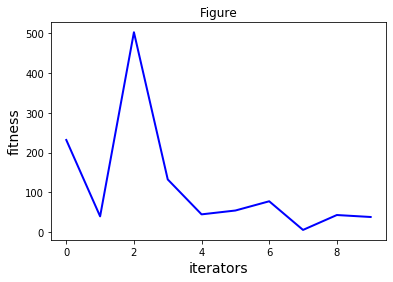

In [1]:
import numpy as np  
import random   
import matplotlib.pyplot as plt
import math

# PSO参数设置
class PSO():
    # 初始化
    def __init__(self, parameters):       
        self.pN = parameters[0]                     #粒子數量
        self.var_num = len(parameters[1]) 
        self.dim = []                               #搜索維度
        self.dim.append(parameters[1])
        self.dim.append(parameters[2])
        self.max_iter = parameters[3]               #迭代次數  
        
        self.X = np.zeros((self.pN,self.var_num))       #所有粒子的位置  
        self.V = np.zeros((self.pN,self.var_num))       #所有粒子的速度
        
        self.pbest = np.zeros((self.pN,self.var_num))   #個體的最佳位置  
        self.gbest = np.zeros((1,self.var_num))         #全局最佳位置

        temp = 1e10
        #粒子數量(pN)而後更新維度(dim)
        for i in range(self.pN):
            for j in range(self.var_num):
                self.X[i][j] = random.uniform(self.dim[j][0], self.dim[j][1])
                self.V[i][j] = random.uniform(0, 1)
                
            self.pbest[i] = self.X[i]
            fit = self.fitness(self.pbest[i])
            if fit < temp:
                self.gbest = self.pbest[i]
                temp = fit
                
#         print(self.gbest, fit)
                
    # 評估粒子位置的函數值
    def fitness(self, var):
        x = var[0]
        y = var[1]
        z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
        return z
    
    # 根據位置與速度更新粒子下一次的位置
    def update_operator(self, pN):
        c1 = 2
        c2 = 2
        w = 0.4        #自身權重
        for i in range(self.pN):
            # 更新速度
            self.V[i] = w * self.V[i] + c1 * random.uniform(0, 1) * (self.pbest[i] - self.X[i]) + c2 * random.uniform(0, 1) * (self.gbest - self.X[i])
            # 更新位置
            self.X[i] = self.X[i] + self.V[i]
            
#             for j in range(self.var_num):
#                 if self.X[i][j] < self.dim[j][0]:
#                     self.X[i][j] = self.dim[j][0]
#                 if self.X[i][j] > self.dim[j][1]:
#                     self.X[i][j] = self.dim[j][1]
            
            if self.fitness(self.X[i]) < self.fitness(self.pbest[i]):
                self.pbest[i] = self.X[i]
            if self.fitness(self.X[i]) < self.fitness(self.gbest):
                self.gbest = self.X[i]
     
    # 程式循環
    def main(self):
        obj = []
#         self.ng_best = np.zeros((1, self.var_num))[0]
        self.ng_best = [50, 50]
        print(self.ng_best)
        for generation in range(self.max_iter):
            self.update_operator(self.pN)
            obj.append(self.fitness(self.gbest))
            print('############ Generation {} ############'.format(str(generation + 1)))
            if self.fitness(self.gbest) <  self.fitness(self.ng_best):
                self.ng_best = self.gbest
                print(self.ng_best)
            print("最好位置：{}".format(self.ng_best))
            print("最小函數值：{}".format(self.fitness(self.ng_best)))
        print("-----End of Searching-----")
        
        plt.figure()
        plt.title("Figure")
        plt.xlabel("iterators", size = 14)
        plt.ylabel("fitness", size = 14 )
        t = [t for t in range(self.max_iter)]
        plt.plot(t, obj, color = 'b', linewidth = 2)
        plt.show()

if __name__ == '__main__':
    pN = 10
    max_iter = 10
    a = (-1e2, 1e2)
    b = (-1e2, 1e2)
    parameters = [pN, a, b, max_iter]
    pso = PSO(parameters)
    pso.main()

# Vmax

############ Generation 1 ############
[0.40006062 0.70406689]
最好位置：[0.40006062 0.70406689]
最小函數值：1.2481696026338363
############ Generation 2 ############
最好位置：[-56.88472049  41.47008639]
最小函數值：6675.837482748254
############ Generation 3 ############
[7.51517637 3.76613831]
最好位置：[7.51517637 3.76613831]
最小函數值：85.10358369353577
############ Generation 4 ############
[-1.24670438 -0.58175937]
最好位置：[-1.24670438 -0.58175937]
最小函數值：2.424940070220729
############ Generation 5 ############
[-4.40710221  2.03990155]
最好位置：[-4.40710221  2.03990155]
最小函數值：28.246955927958304
############ Generation 6 ############
[-1.4370155   0.58550459]
最好位置：[-1.4370155   0.58550459]
最小函數值：2.970736556567237
############ Generation 7 ############
[ 4.49941258 -6.88164854]
最好位置：[ 4.49941258 -6.88164854]
最小函數值：115.25902553383952
############ Generation 8 ############
[-4.63180257  3.0256312 ]
最好位置：[-4.63180257  3.0256312 ]
最小函數值：39.79313547672788
############ Generation 9 ############
[3.21419411 0.82618779]
最好位置：[

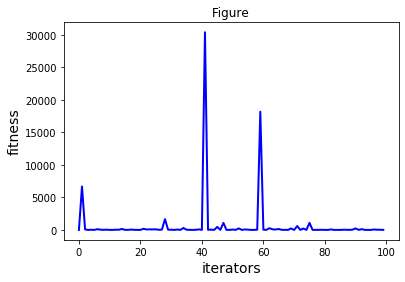

In [108]:
import numpy as np  
import random   
import matplotlib.pyplot as plt
import math

# PSO参数设置
class PSO():
    # 初始化
    def __init__(self, parameters):       
        self.pN = parameters[0]                     #粒子數量
        self.var_num = len(parameters[1]) 
        self.dim = []                               #搜索維度
        self.dim.append(parameters[1])
        self.dim.append(parameters[2])
        self.max_iter = parameters[3]               #迭代次數  
        self.Vmax = 100
        self.X = np.zeros((self.pN,self.var_num))       #所有粒子的位置  
        self.V = np.zeros((self.pN,self.var_num))       #所有粒子的速度
        
        self.pbest = np.zeros((self.pN,self.var_num))   #個體的最佳位置  
        self.gbest = np.zeros((1,self.var_num))         #全局最佳位置
        temp = 1e10
        #粒子數量(pN)而後更新維度(dim)
        for i in range(self.pN):
            for j in range(self.var_num):
                self.X[i][j] = random.uniform(self.dim[j][0], self.dim[j][1])
                self.V[i][j] = random.uniform(0, 1)
                
            self.pbest[i] = self.X[i]
            fit = self.fitness(self.pbest[i])
            if fit < temp:
                self.gbest = self.pbest[i]
                temp = fit
                
#         print(self.gbest, fit)
                
    # 評估粒子位置的函數值
    def fitness(self, var):
        x = var[0]
        y = var[1]
        z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
        return z
    
    # 根據位置與速度更新粒子下一次的位置
    def update_operator(self, pN):
        c1 = 2
        c2 = 2
        for i in range(self.pN):
            # 更新速度
            self.V[i] = self.V[i] + c1 * random.uniform(0, 1) * (self.pbest[i] - self.X[i]) + c2 * random.uniform(0, 1) * (self.gbest - self.X[i])

            for a in range(self.var_num):
                if self.V[i][a] > self.Vmax:
                    self.V[i][a] = self.Vmax
                if self.V[i][a] < -self.Vmax:
                    self.V[i][a] = -self.Vmax
                    
            # 更新位置
            self.X[i] = self.X[i] + self.V[i]
            
            
            if self.fitness(self.X[i]) < self.fitness(self.pbest[i]):
                self.pbest[i] = self.X[i]
            if self.fitness(self.X[i]) < self.fitness(self.gbest):
                self.gbest = self.X[i]
     
    # 程式循環
    def main(self):
        obj = []
#         self.ng_best = np.zeros((1, self.var_num))[0]
        self.ng_best = [50, 50]
        for generation in range(self.max_iter):
            self.update_operator(self.pN)
            obj.append(self.fitness(self.gbest))
            print('############ Generation {} ############'.format(str(generation + 1)))
            if self.fitness(self.gbest) <  self.fitness(self.ng_best):
                self.ng_best = self.gbest
                print(self.ng_best)
            print("最好位置：{}".format(self.ng_best))
            print("最小函數值：{}".format(self.fitness(self.ng_best)))
        print("-----End of Searching-----")
        
        plt.figure()
        plt.title("Figure")
        plt.xlabel("iterators", size = 14)
        plt.ylabel("fitness", size = 14 )
        t = [t for t in range(self.max_iter)]
        plt.plot(t, obj, color = 'b', linewidth = 2)
        plt.show()

if __name__ == '__main__':
    pN = 100
    max_iter = 100
    a = (-1e2, 1e2)
    b = (-1e2, 1e2)
    parameters = [pN, a, b, max_iter]
    pso = PSO(parameters)
    pso.main()

# Vmax(by Fan)

############ Generation 1 ############
[ -4.25092346 -15.83999918]
最好位置：[ -4.25092346 -15.83999918]
最小函數值：520.0903922704559
############ Generation 2 ############
[ 2.34754614 -1.89487833]
最好位置：[ 2.34754614 -1.89487833]
最小函數值：13.065598850403022
############ Generation 3 ############
最好位置：[15.43237989 16.10361513]
最小函數值：757.0637939515649
############ Generation 4 ############
最好位置：[6.65805011 4.03432023]
最小函數值：76.90947949263371
############ Generation 5 ############
最好位置：[ -4.6373584  -11.50277714]
最小函數值：286.14440471976127
############ Generation 6 ############
最好位置：[-14.19869243 -24.65461469]
最小函數值：1417.570489576004
############ Generation 7 ############
[-13.00368698  19.52518198]
最好位置：[-13.00368698  19.52518198]
最小函數值：932.1462700956928
############ Generation 8 ############
[-26.28725523  -2.08618259]
最好位置：[-26.28725523  -2.08618259]
最小函數值：700.1516550675285
############ Generation 9 ############
[ 2.09652163e+01 -7.54962905e-03]
最好位置：[ 2.09652163e+01 -7.54962905e-03]
最小函數值：440.123153

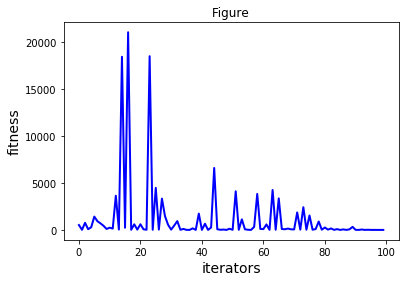

In [111]:
import numpy as np  
import random   
import matplotlib.pyplot as plt
import math

# PSO参数设置
class PSO():
    # 初始化
    def __init__(self, parameters):       
        self.pN = parameters[0]                     #粒子數量
        self.var_num = len(parameters[1]) 
        self.dim = []                               #搜索維度
        self.dim.append(parameters[1])
        self.dim.append(parameters[2])
        self.max_iter = parameters[3]               #迭代次數  
        self.Vmax = 100
        self.gen = 0
        self.X = np.zeros((self.pN,self.var_num))       #所有粒子的位置  
        self.V = np.zeros((self.pN,self.var_num))       #所有粒子的速度
        
        self.pbest = np.zeros((self.pN,self.var_num))   #個體的最佳位置  
        self.gbest = np.zeros((1,self.var_num))         #全局最佳位置
        temp = 1e10
        #粒子數量(pN)而後更新維度(dim)
        for i in range(self.pN):
            for j in range(self.var_num):
                self.X[i][j] = random.uniform(self.dim[j][0], self.dim[j][1])
                self.V[i][j] = random.uniform(0, 1)
                
            self.pbest[i] = self.X[i]
            fit = self.fitness(self.pbest[i])
            if fit < temp:
                self.gbest = self.pbest[i]
                temp = fit
                
#         print(self.gbest, fit)
                
    # 評估粒子位置的函數值
    def fitness(self, var):
        x = var[0]
        y = var[1]
        z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
        return z
    
    # 根據位置與速度更新粒子下一次的位置
    def update_operator(self, pN):
        c1 = 2
        c2 = 2
        T = self.max_iter
        h = 1
        t = self.gen
        for i in range(self.pN):
            # 更新速度
            self.V[i] = self.V[i] + c1 * random.uniform(0, 1) * (self.pbest[i] - self.X[i]) + c2 * random.uniform(0, 1) * (self.gbest - self.X[i])

            for a in range(self.var_num):
#                 print(T, t)
                if self.V[i][a] > (1 - (t/T) ** h) * self.Vmax:
                    self.V[i][a] = (1 - (t/T) ** h) * self.Vmax
                if self.V[i][a] < -(1 - (t/T) ** h) *  self.Vmax:
                    self.V[i][a] = -(1 - (t/T) ** h) *  self.Vmax
                    
            # 更新位置
            self.X[i] = self.X[i] + self.V[i]
            
            
            if self.fitness(self.X[i]) < self.fitness(self.pbest[i]):
                self.pbest[i] = self.X[i]
            if self.fitness(self.X[i]) < self.fitness(self.gbest):
                self.gbest = self.X[i]
     
    # 程式循環
    def main(self):
        obj = []
#         self.ng_best = np.zeros((1, self.var_num))[0]
        self.ng_best = [50, 50]
        for generation in range(self.max_iter):
            self.update_operator(self.pN)
            obj.append(self.fitness(self.gbest))
            print('############ Generation {} ############'.format(str(generation + 1)))
            if self.fitness(self.gbest) <  self.fitness(self.ng_best):
                self.ng_best = self.gbest
                print(self.ng_best)
            print("最好位置：{}".format(self.ng_best))
            print("最小函數值：{}".format(self.fitness(self.ng_best)))
            self.gen += 1
        print("-----End of Searching-----")
        
        plt.figure()
        plt.title("Figure")
        plt.xlabel("iterators", size = 14)
        plt.ylabel("fitness", size = 14 )
        t = [t for t in range(self.max_iter)]
        plt.plot(t, obj, color = 'b', linewidth = 2)
        plt.show()

if __name__ == '__main__':
    pN = 10
    max_iter = 100
    a = (-1e2, 1e2)
    b = (-1e2, 1e2)
    parameters = [pN, a, b, max_iter]
    pso = PSO(parameters)
    pso.main()

# GCPSO

self.nX[i] [ 1.35047606 -0.59539778]
self.GX [-7.68387921 42.11446195]
最小函數值：3606.6369017812426
self.nX[i] [-0.74912383 27.54832758]
self.GX [ 7.86998468 25.6022344 ]
self.nX[i] [15.21005846 -0.28624693]
self.GX [ 19.43167031 -12.28374431]
self.nX[i] [  8.8076097  -15.06876018]
self.GX [54.72020902  5.7836528 ]
self.nX[i] [ 9.93692645 10.84462905]
self.GX [-20.14043919  14.15573554]
最小函數值：806.7346393515734
self.nX[i] [ 0.80333175 16.63891774]
self.GX [ 8.03931574 25.77156545]
self.nX[i] [ 7.42565767 24.20181506]
self.GX [ 19.58096015 -12.13445447]
self.nX[i] [11.60503222  0.375497  ]
self.GX [ 32.95559426 -38.86375203]
self.nX[i] [41.9835042  29.32817037]
self.GX [-65.44115532 -45.2074727 ]
self.nX[i] [-49.19813218 -37.58674228]
self.GX [-48.0956463   72.49137041]
最小函數值：806.7346393515734
self.nX[i] [-14.00586873  25.41352762]
self.GX [ 8.01476405 25.74701377]
self.nX[i] [13.2503476   7.77045395]
self.GX [ 19.5936922  -12.12172243]
self.nX[i] [ 12.43773886 -11.71394428]
self.GX [  3.683

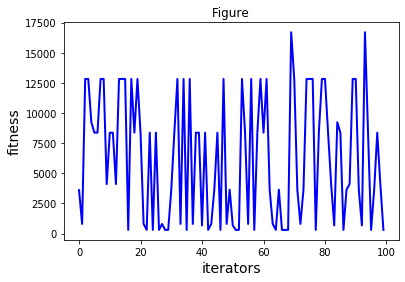

In [11]:
import numpy as np  
import random   
import matplotlib.pyplot as plt
import math

# PSO参数设置
class PSO():
    # 初始化
    def __init__(self, parameters):
        self.ft = 1
        self.s = 0.5
        self.f = 0.2
        self.success = 0
        self.failure = 0
        
        self.pN = parameters[0]                     #粒子數量
        self.var_num = len(parameters[1]) 
        self.dim = []                               #搜索維度
        self.dim.append(parameters[1])
        self.dim.append(parameters[2])
        self.max_iter = parameters[3]               #迭代次數  
        self.gen = 1
        self.X = np.zeros((self.pN,self.var_num))       #所有粒子的位置  
        self.V = np.zeros((self.pN,self.var_num))       #所有粒子的速度
        self.nX = np.zeros((self.pN,self.var_num))       #所有粒子的位置  
        self.nV = np.zeros((self.pN,self.var_num))
        self.GX = np.zeros((1,self.var_num)) 
        self.GV = np.zeros((1,self.var_num))

        self.pbest = np.zeros((self.pN,self.var_num))   #個體的最佳位置  
        self.gbest = np.zeros((1,self.var_num))         #全局最佳位置
        
        temp = 1e10
        #粒子數量(pN)而後更新維度(dim)
        for i in range(self.pN):
            for j in range(self.var_num):
                self.X[i][j] = random.uniform(self.dim[j][0], self.dim[j][1])
                self.V[i][j] = random.uniform(0, 1)
                
            self.pbest[i] = self.X[i]
            fit = self.fitness(self.pbest[i])
            if fit < temp:
                self.gbest = self.pbest[i]
                temp = fit
                
#         print(self.gbest, fit)
                
    # 評估粒子位置的函數值
    def fitness(self, var):
        x = var[0]
        y = var[1]
        z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
        return z
    
    # 根據位置與速度更新粒子下一次的位置
    def update_operator(self, pN):
        c1 = 2
        c2 = 2
        w = 0.4        #自身權重
        t = self.gen

        for i in range(self.pN):
            
            # 更新速度
            self.nV[i] = w * self.V[i] + c1 * random.uniform(0, 1) * (self.pbest[i] - self.X[i]) + c2 * random.uniform(0, 1) * (self.gbest - self.X[i])
            # 更新位置
            self.nX[i] = self.X[i] + self.nV[i]

            if self.fitness(self.nX[i]) < self.fitness(self.pbest[i]):
                self.pbest[i] = self.nX[i]       
            if self.fitness(self.nX[i]) < self.fitness(self.gbest):
                self.GV = w * self.V[i] + self.ft * random.uniform(-1, 1)
                self.GX = self.X[i] + self.GV
                print("self.nX[i]", self.nX[i])
                print("self.GX", self.GX)
                self.gbest = self.GX
#                 print("BEST", self.gbest )
                if (self.success / t) > self.s:
                    self.ft = 2 * self.ft
                elif (self.failure / t) > self.f:
                    self.ft = 0.5 * self.ft
                else:
                    self.ft = self.ft
                    
                self.success += 1
                self.failure = 0
            else:
                self.success = 0
                self.failure += 1
                
#             print("success:", self.success, "failure:",self.failure)
     
    # 程式循環
    def main(self):
        obj = []
#         self.ng_best = np.zeros((1, self.var_num))[0]
        self.ng_best = [50, 50]
        for generation in range(self.max_iter):
            self.update_operator(self.pN)
            obj.append(self.fitness(self.gbest))
            #print('############ Generation {} ############'.format(str(generation + 1)))
            if self.fitness(self.gbest) <  self.fitness(self.ng_best):
                self.ng_best = self.gbest
            #print("最好位置：{}".format(self.ng_best))
            print("最小函數值：{}".format(self.fitness(self.ng_best)))
            self.gen += 1
        print("-----End of Searching-----")
        
        plt.figure()
        plt.title("Figure")
        plt.xlabel("iterators", size = 14)
        plt.ylabel("fitness", size = 14 )
        t = [t for t in range(self.max_iter)]
        plt.plot(t, obj, color = 'b', linewidth = 2)
        plt.show()

if __name__ == '__main__':
    pN = 20
    max_iter = 100
    a = (-1e2, 1e2)
    b = (-1e2, 1e2)
    parameters = [pN, a, b, max_iter]
    pso = PSO(parameters)
    pso.main()